In [1]:
import numpy as np

In [38]:
%matplotlib inline

from matplotlib import pyplot as plt


In [3]:
means = np.random.normal(loc= 0, scale = 1, size = (2000, 10))

In [4]:
means[0]

array([-0.39783371, -1.12593155, -1.98856583, -1.20557544,  0.03525123,
        0.32511122,  2.72542677,  1.18867912, -0.81343881,  2.6791546 ])

In [103]:
'''
q_n = average of returns so far for each action
c_n = count of each action so far

return an action that is epsilon-greedy
'''
def epsilon_greedy_action( q_n, c_n, epsilon ):
    e_value = np.random.uniform( low = 0, high = 1 )
    
    if e_value < 1 - epsilon:
        '''Greedy'''
        argmaxs = np.argwhere(q_n == np.amax(q_n)).flatten()
        if len(argmaxs) == 1:
            return argmaxs[0]
        else:
            return argmaxs[np.random.randint(low = 0, high = len(argmaxs))]
    else:
        '''Exploratory'''
        return np.random.randint(low = 0, high = 10)

In [104]:
'''
Get a reward from doing the action on the predefined config
'''
def get_reward ( config, action ):
    mean, variance = config[action]
    
    return np.random.normal(loc= mean, scale = variance)

'''
For a set of parameters for 10-arm bandit problem, run through a number of iteration and draw statistic

config = np.array of size (2,10), first row for mean, second row for variance
policy = a function that take in (q_n, c_n) and return an action
iterations = number of iterations

Return:
actions: all actions that have been selected
rewards: all rewards that have been received
c_ns: number of actions correspond to max action
'''
def run_for_one_config( config, policy, iterations = 1000):
    q_n = np.zeros(10)
    c_n = np.zeros(10, dtype=np.int32)
    
    actions = []
    rewards = []
    c_ns = []
    
    max_action = np.argmax(config[:,0])
    
    for i in range(iterations):
        action = policy (q_n, c_n)
        reward = get_reward ( config, action )
        
        # Update q_n, c_n
        c_n[action] += 1
        q_n[action] += ( reward - q_n[action] ) / c_n[action]
        c_ns.append(c_n[max_action])
        
        actions.append(action)
        rewards.append(reward)
        
    return np.array(actions), np.array(rewards), np.array(c_ns)

'''
Params:
actions: all actions that have been selected
rewards: all rewards that have been received

Return:
ave_rewards: average rewards that have been received so far

'''
def turn_to_statistics( rewards, iterations = 1000):
    ave_rewards = []
    last_average_reward = 0 # (it is actually ave_rewards[i-1])
    
    for i in range(iterations):
        last_average_reward = last_average_reward + ( rewards[i] - last_average_reward )/(i + 1) 
        ave_rewards.append(last_average_reward)
        
    return np.array(ave_rewards)

In [105]:
config = np.stack([means[0], np.ones(10)]).T
print(config)

[[-0.39783371  1.        ]
 [-1.12593155  1.        ]
 [-1.98856583  1.        ]
 [-1.20557544  1.        ]
 [ 0.03525123  1.        ]
 [ 0.32511122  1.        ]
 [ 2.72542677  1.        ]
 [ 1.18867912  1.        ]
 [-0.81343881  1.        ]
 [ 2.6791546   1.        ]]


In [106]:
actions, rewards, cns = run_for_one_config( config, lambda q_n, c_n : epsilon_greedy_action( q_n, c_n, 0.1))
actions2, rewards2, cns2 = run_for_one_config( config, lambda q_n, c_n : epsilon_greedy_action( q_n, c_n, 0.01))
actions3, rewards3, cns3 = run_for_one_config( config, lambda q_n, c_n : epsilon_greedy_action( q_n, c_n, 0))

In [107]:
avg_rewards = turn_to_statistics(rewards)
avg_rewards2 = turn_to_statistics(rewards2)
avg_rewards3 = turn_to_statistics(rewards3)

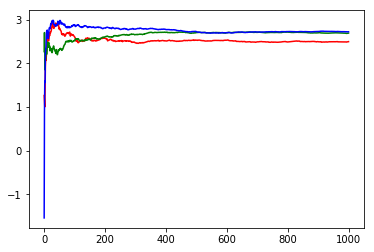

In [108]:
plt.plot(np.arange(1000),avg_rewards, color ='r')
plt.plot(np.arange(1000),avg_rewards2, color = 'g')
plt.plot(np.arange(1000),avg_rewards3, color = 'b')


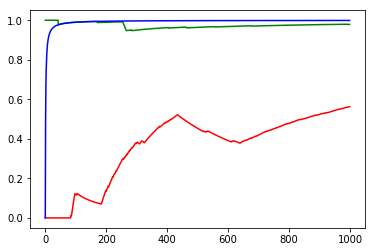

In [110]:
plt.plot(np.arange(1000),cns/np.arange(1,1001), color ='r')
plt.plot(np.arange(1000),cns2/np.arange(1,1001), color = 'g')
plt.plot(np.arange(1000),cns3/np.arange(1,1001), color = 'b')

In [114]:
# Average for multiple configuration
avg_cns = np.zeros((3,1000))
avg_avg_rewards = np.zeros((3,1000))

epsilons = [0.1, 0.01, 0]
for i in range(100):
    if i % 100 == 0:
        print (i)
    config = np.stack([means[i], np.ones(10)]).T
    
    for j in range(len(epsilons)):
        actions, rewards, cns = run_for_one_config( config, lambda q_n, c_n : epsilon_greedy_action( q_n, c_n, epsilons[j]))
        avg_rewards = turn_to_statistics(rewards)
        
        avg_cns[j] += (cns - avg_cns[j]) * 1.0 / (i+1)
        avg_avg_rewards[j] += (avg_rewards - avg_avg_rewards[j]) * 1.0 / (i+1)

0


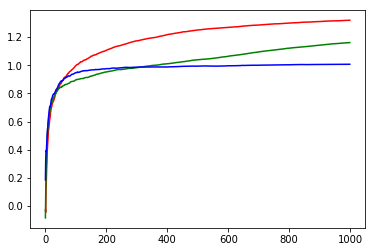

In [115]:
plt.plot(np.arange(1000),avg_avg_rewards[0], color ='r')
plt.plot(np.arange(1000),avg_avg_rewards[1], color = 'g')
plt.plot(np.arange(1000),avg_avg_rewards[2], color = 'b')


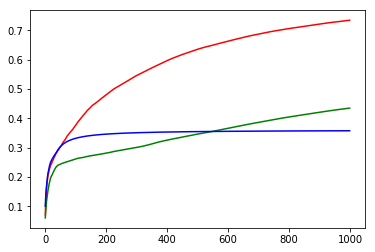

In [116]:
plt.plot(np.arange(1000),avg_cns[0]/np.arange(1,1001), color ='r')
plt.plot(np.arange(1000),avg_cns[1]/np.arange(1,1001), color = 'g')
plt.plot(np.arange(1000),avg_cns[2]/np.arange(1,1001), color = 'b')

In [92]:
means[:3]

array([[-0.39783371, -1.12593155, -1.98856583, -1.20557544,  0.03525123,
         0.32511122,  2.72542677,  1.18867912, -0.81343881,  2.6791546 ],
       [ 1.80778576, -1.66796189,  0.39943735,  0.0744907 ,  0.02816629,
         2.46286334,  0.66194674,  0.86717812, -0.13513382, -0.13935182],
       [ 0.43480839, -1.21007101,  0.57837772, -0.10221819, -0.39313696,
         1.39522989,  0.92052636, -0.41080767, -0.41763138,  0.5765782 ]])

In [99]:
argmaxs = np.argwhere([1,1,2] == np.amax([1,1,2]))

In [100]:
argmaxs

array([[2]], dtype=int64)

In [102]:
l = [7, 6, 5, 7, 6, 7, 6, 6, 6, 4, 5, 6]
np.argwhere(l == np.max(l)).flatten()

array([0, 3, 5], dtype=int64)

In [159]:
'''
Upper confidence bound action

q_n: average of returns so far for each action
c_n: count of each action so far
c: control degree of exploration

return an action that is not yet explored much relatively
'''
def ucb_action( q_n, c_n, c ):
    modified_qn = np.copy(q_n)
    
    # actions that hasn't been done
    not_explored_actions = np.argwhere(c_n == 0).flatten()
    
    if (len(not_explored_actions) != 0) :
        # Pick from one of these action
        return not_explored_actions[np.random.randint(low = 0, high = len(not_explored_actions))]
    
    total_step = np.sum(c_n)
    modified_qn += np.sqrt(np.log(total_step)/c_n)
    
    argmaxs = np.argwhere(modified_qn == np.amax(modified_qn)).flatten()
    if len(argmaxs) == 1:
        return argmaxs[0]
    else:
        return argmaxs[np.random.randint(low = 0, high = len(argmaxs))]

In [147]:
ucb_action ( np.array([1.0,2, 3.0, 1.5, 0.5]), np.array([1,2,2,1,1]), 2)

[ 2.39495883  2.98638485  3.98638485  2.89495883  1.89495883]


2

In [160]:
# Compare epsilon 0.1 with ucb
avg_cns_2 = np.zeros((2,1000))
avg_avg_rewards_2 = np.zeros((2,1000))

for i in range(100):
    if i % 100 == 0:
        print (i)
    config = np.stack([means[i], np.ones(10)]).T
    
    actions, rewards, cns = run_for_one_config( config, lambda q_n, c_n : ucb_action( q_n, c_n, 2))
    avg_rewards = turn_to_statistics(rewards)
        
    avg_cns_2[0] += (cns - avg_cns[j]) * 1.0 / (i+1)
    avg_avg_rewards_2[0] += (avg_rewards - avg_avg_rewards[j]) * 1.0 / (i+1)
    
avg_cns_2[1] = avg_cns[1]
avg_avg_rewards_2[1] = avg_avg_rewards[1]


0


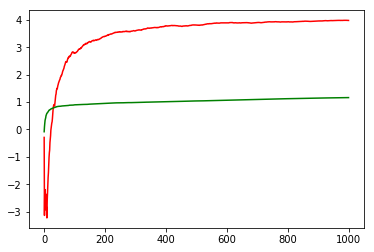

In [161]:
plt.plot(np.arange(1000),avg_avg_rewards_2[0], color ='r')
plt.plot(np.arange(1000),avg_avg_rewards_2[1], color = 'g')